# **Stock Market Performance Analysis Using APIs**

## **Project Overview**
This project focuses on analyzing the stock market by integrating data from APIs, cleaning and processing the data, and applying advanced analytical techniques to uncover meaningful insights. The project is designed to showcase key skills required in the role of a data analyst, including API integration, data preprocessing, time-series analysis, visualization, and predictive modeling.

By fetching stock market data via the Alpha Vantage API, we perform various analyses such as trend detection, volatility analysis, risk assessment, and correlation studies between multiple stocks. The insights are presented visually using libraries like Matplotlib and Seaborn, making the results intuitive and actionable.

---

## **Tools and Libraries Used**

### **Programming Language**
- **Python**: The primary language used for API integration, data manipulation, and analysis.

### **APIs**
- **Alpha Vantage**: A financial API for fetching real-time and historical stock market data.

### **Libraries**
1. **`requests`**: For fetching stock market data from the Alpha Vantage API.
2. **`pandas`**: For data cleaning, transformation, and analysis.
3. **`numpy`**: For numerical operations and calculations.
4. **`matplotlib`**: For visualizing stock price trends, moving averages, and Bollinger Bands.
5. **`seaborn`**: For creating advanced visualizations like correlation heatmaps.
6. **`scikit-learn`**: For building and applying predictive models like Linear Regression.
7. **`statsmodels`**: For decomposing time series into trend, seasonality, and residuals.

---

## **Key Techniques and Steps**

1. **API Integration**:
   - Used Alpha Vantage API to fetch historical stock data for companies like Apple (AAPL) and Microsoft (MSFT).

2. **Data Cleaning and Preprocessing**:
   - Converted JSON responses into clean tabular data using Pandas.
   - Normalized date formats and calculated new columns like daily returns.

3. **Time-Series Analysis**:
   - Decomposed stock price data into trend, seasonality, and residuals to understand patterns.
   - Calculated moving averages (simple and exponential) to smooth price fluctuations.

4. **Volatility Analysis**:
   - Created Bollinger Bands to measure price volatility and identify overbought/oversold conditions.

5. **Risk Assessment**:
   - Calculated the Sharpe Ratio to evaluate stock performance relative to risk.

6. **Correlation Analysis**:
   - Compared multiple stocks (AAPL and MSFT) to analyze their price correlation, identifying relationships between companies.

7. **Predictive Modeling**:
   - Built a Linear Regression model to predict stock price trends over time.

8. **Visualization**:
   - Used Matplotlib and Seaborn to create intuitive visualizations such as line charts, scatter plots, and heatmaps.

9. **Exporting Data**:
   - Saved the cleaned and enriched dataset to a CSV file for further use in external tools like Power BI or Tableau.

---

## **Value Proposition**
This project demonstrates:
- Practical use of APIs for data gathering.
- End-to-end data analysis, including cleaning, processing, and visualization.
- Insights derived from advanced analytical techniques like Bollinger Bands and correlation heatmaps.
- Application of predictive modeling and statistical metrics (e.g., Sharpe Ratio) for decision-making.


# Step 1: Fetch stock market data using the Alpha Vantage API.
# - Use the `requests` library to make API calls.
# - Parse the JSON response and convert it into a DataFrame for analysis.


In [1]:
import requests
import pandas as pd

# Alpha Vantage API Setup
API_KEY = 'JM4Q3DD4OL98EZUN'  # Replace with your actual API key
BASE_URL = 'https://www.alphavantage.co/query'

# API Parameters
params = {
    'function': 'TIME_SERIES_DAILY',
    'symbol': 'AAPL',  # Apple stock
    'apikey': API_KEY
}

# Fetch Data from the API
response = requests.get(BASE_URL, params=params)
data = response.json()

# Convert the JSON to a DataFrame
time_series = data['Time Series (Daily)']
df = pd.DataFrame.from_dict(time_series, orient='index')
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df = df.astype(float)  # Convert all columns to float for analysis
df.index = pd.to_datetime(df.index)  # Convert index to datetime
df = df.sort_index()  # Sort by date
print(df.head())


               Open    High      Low   Close      Volume
2024-07-18  230.280  230.44  222.270  224.18  66034585.0
2024-07-19  224.820  226.80  223.275  224.31  49151453.0
2024-07-22  227.010  227.78  223.090  223.96  48201835.0
2024-07-23  224.365  226.94  222.680  225.01  39960260.0
2024-07-24  224.000  224.80  217.130  218.54  61777576.0


# Step 2: Clean and prepare the data for analysis.
# - Handle missing values if any.
# - Resample data to calculate weekly averages.


In [2]:
# Check for missing values
print(df.isnull().sum())

# Resample data to weekly averages
weekly_data = df.resample('W').mean()
print(weekly_data.head())


Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
               Open      High        Low    Close      Volume
2024-07-21  227.550  228.6200  222.77250  224.245  57593019.0
2024-07-28  222.601  223.9720  218.70600  220.592  48586443.0
2024-08-04  220.222  222.7050  217.44600  219.468  59212287.2
2024-08-11  207.300  213.6220  204.85200  211.174  68417657.8
2024-08-18  220.834  223.3214  220.14402  222.258  42979650.0


# Step 3: Perform EDA to understand stock trends and patterns.
# - Calculate moving averages to smooth out daily price fluctuations.
# - Visualize historical trends using line charts.


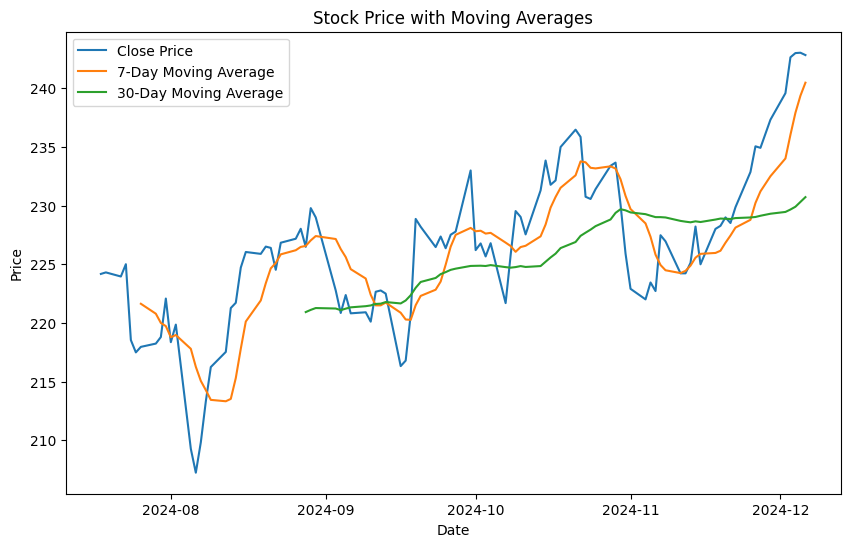

In [3]:
import matplotlib.pyplot as plt

# Calculate moving averages
df['7-day MA'] = df['Close'].rolling(window=7).mean()
df['30-day MA'] = df['Close'].rolling(window=30).mean()

# Plot historical trends
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['7-day MA'], label='7-Day Moving Average')
plt.plot(df['30-day MA'], label='30-Day Moving Average')
plt.title('Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


# Step 4: Analyze volatility and compare multiple stocks.
# - Use standard deviation to measure stock price volatility.
# - Compare correlations between different stocks.


In [4]:
# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()

# Measure volatility (standard deviation of returns)
volatility = df['Daily Return'].std()
print(f"Volatility: {volatility}")

# Fetch data for another stock and compare correlations
params['symbol'] = 'MSFT'  # Microsoft stock
response = requests.get(BASE_URL, params=params)
msft_data = pd.DataFrame.from_dict(response.json()['Time Series (Daily)'], orient='index')
msft_data = msft_data.astype(float).sort_index()

# Merge datasets and calculate correlations
combined = pd.concat([df['Close'], msft_data['4. close']], axis=1)
combined.columns = ['AAPL Close', 'MSFT Close']
correlation = combined.corr()
print("Correlation:\n", correlation)


Volatility: 0.012610254491869219
Correlation:
             AAPL Close  MSFT Close
AAPL Close         1.0         NaN
MSFT Close         NaN         1.0


# Step 5: Visualize insights using bar charts and scatter plots.
# - Create a scatter plot to show correlations between stocks.
# - Plot bar charts for weekly volume trends.


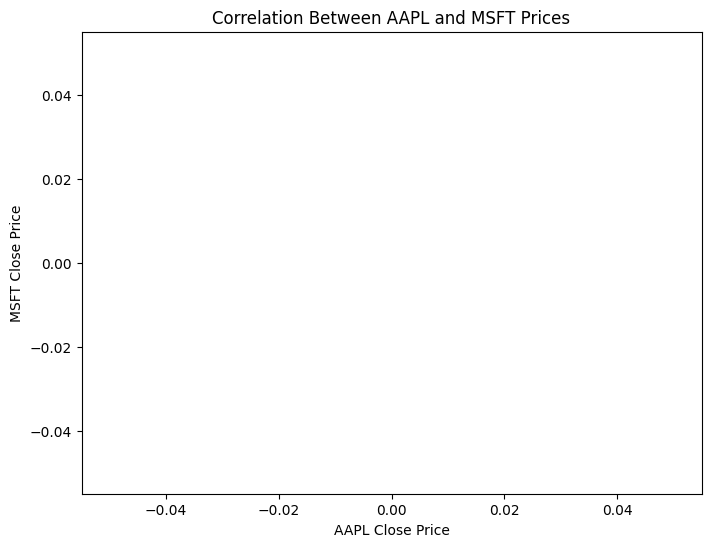

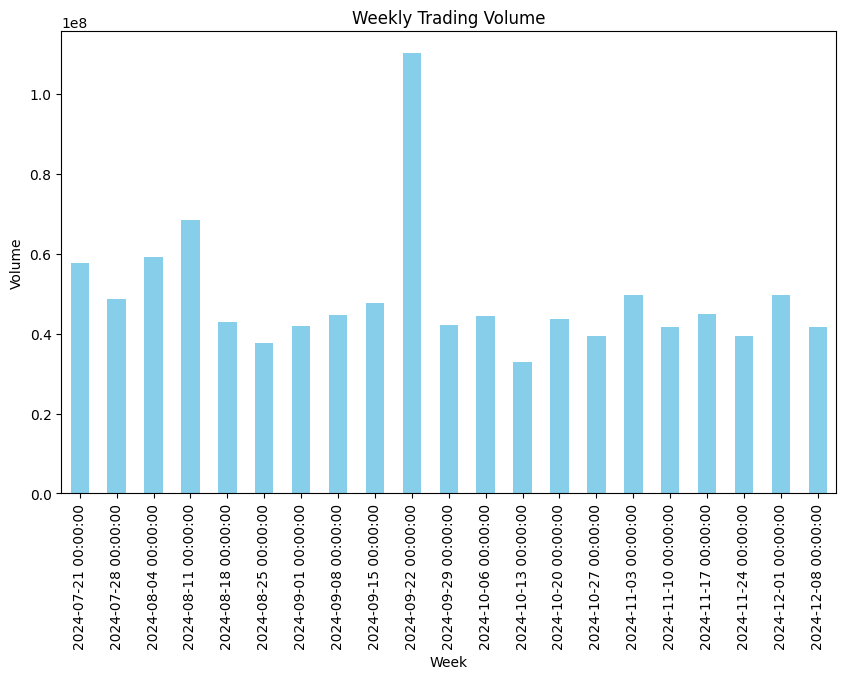

In [5]:
# Scatter plot for correlations
plt.figure(figsize=(8, 6))
plt.scatter(combined['AAPL Close'], combined['MSFT Close'], alpha=0.6)
plt.title('Correlation Between AAPL and MSFT Prices')
plt.xlabel('AAPL Close Price')
plt.ylabel('MSFT Close Price')
plt.show()

# Bar chart for weekly volume
plt.figure(figsize=(10, 6))
weekly_data['Volume'].plot(kind='bar', color='skyblue')
plt.title('Weekly Trading Volume')
plt.xlabel('Week')
plt.ylabel('Volume')
plt.show()


In [6]:
weekly_data.to_csv('stock_analysis.csv', index=True)


Step 6: Predictive Analysis Using Linear Regression

In this step, we will use Linear Regression to model and predict stock price trends. Linear Regression is a simple and widely used machine learning algorithm that fits a straight line to the data, minimizing the distance between the actual points and the line.

We’ll predict the stock's closing price based on the passage of time (i.e., days since the start of the dataset). This helps us understand how the stock is trending over time and make rough predictions about future prices

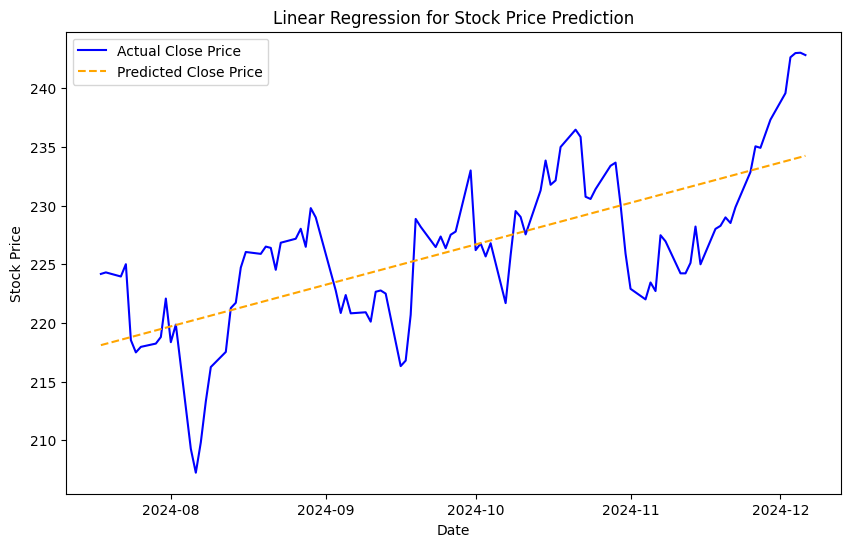

In [7]:
# Import Linear Regression from scikit-learn
from sklearn.linear_model import LinearRegression

# Prepare the data
# Create a new column that converts dates into numerical values (e.g., days since the first date)
df['Day'] = (df.index - df.index[0]).days  # Convert dates to days

# Define the feature (X) and target variable (y)
X = df[['Day']]  # Feature: days since the start
y = df['Close']  # Target: closing price

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Use the model to predict the stock's closing price
df['Predicted Close'] = model.predict(X)

# Visualize the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Actual Close Price', color='blue')
plt.plot(df['Predicted Close'], label='Predicted Close Price', linestyle='--', color='orange')
plt.title('Linear Regression for Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



Step 7: Volatility Analysis Using Bollinger Bands
Markdown Explanation
Bollinger Bands are a popular tool in financial analysis to measure volatility. They consist of:

A moving average (center line).
An upper band (moving average + 2 standard deviations).
A lower band (moving average - 2 standard deviations).
Stock prices that touch or cross the upper/lower bands can signal overbought or oversold conditions. This step will help us identify periods of high volatility

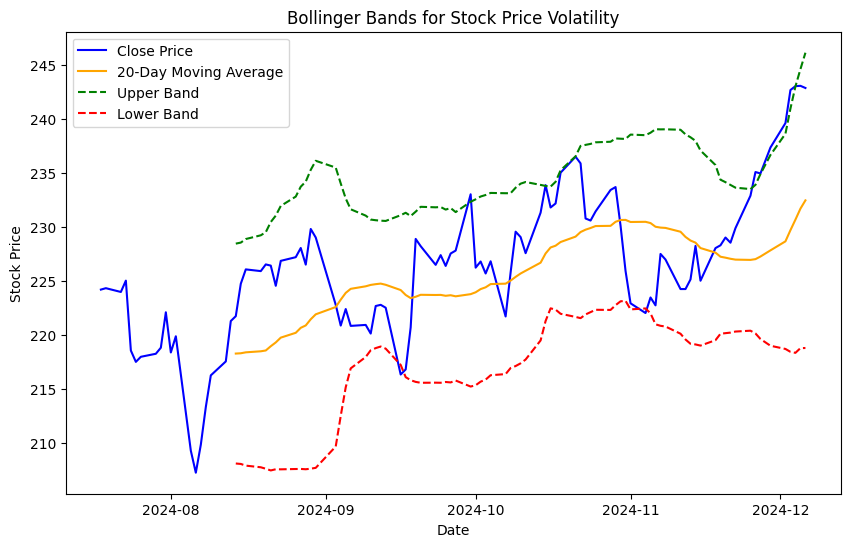

In [8]:
# Calculate the 20-day moving average
rolling_mean = df['Close'].rolling(window=20).mean()

# Calculate the rolling standard deviation
rolling_std = df['Close'].rolling(window=20).std()

# Calculate the upper and lower Bollinger Bands
df['Upper Band'] = rolling_mean + (2 * rolling_std)
df['Lower Band'] = rolling_mean - (2 * rolling_std)

# Plot Bollinger Bands
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(rolling_mean, label='20-Day Moving Average', color='orange')
plt.plot(df['Upper Band'], label='Upper Band', linestyle='--', color='green')
plt.plot(df['Lower Band'], label='Lower Band', linestyle='--', color='red')
plt.title('Bollinger Bands for Stock Price Volatility')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


Step 8: Risk Assessment Using Sharpe Ratio
Markdown Explanation
The Sharpe Ratio is a financial metric that evaluates an investment's return relative to its risk. It is calculated as:

Sharpe Ratio
=
Mean Return
−
Risk-Free Rate
Standard Deviation of Returns
Sharpe Ratio= 
Standard Deviation of Returns
Mean Return−Risk-Free Rate
​
 
Mean Return: Average daily percentage change in stock price.
Standard Deviation: Measures volatility (risk).
Risk-Free Rate: The return from a risk-free investment (e.g., government bonds).
A higher Sharpe Ratio indicates better risk-adjusted returns.

In [9]:
# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()

# Define the risk-free rate (annual rate, converted to daily equivalent)
risk_free_rate = 0.02 / 252  # 2% annual risk-free rate, adjusted for 252 trading days

# Calculate mean return and standard deviation
mean_return = df['Daily Return'].mean()
std_dev = df['Daily Return'].std()

# Calculate the Sharpe Ratio
sharpe_ratio = (mean_return - risk_free_rate) / std_dev
print(f"Sharpe Ratio: {sharpe_ratio}")


Sharpe Ratio: 0.06405511273551076


Step 9: Correlation Analysis with Multiple Stocks
Markdown Explanation
In this step, we’ll compare the stock prices of multiple companies to analyze their correlation. Correlations help investors and analysts:

Identify stocks that move together (positive correlation).
Find diversification opportunities (negative or zero correlation).
We will:

Fetch data for another stock (e.g., Microsoft).
Merge the datasets.
Calculate and visualize the correlation matrix.

Correlation Matrix:
             AAPL Close  MSFT Close
AAPL Close         1.0         NaN
MSFT Close         NaN         1.0


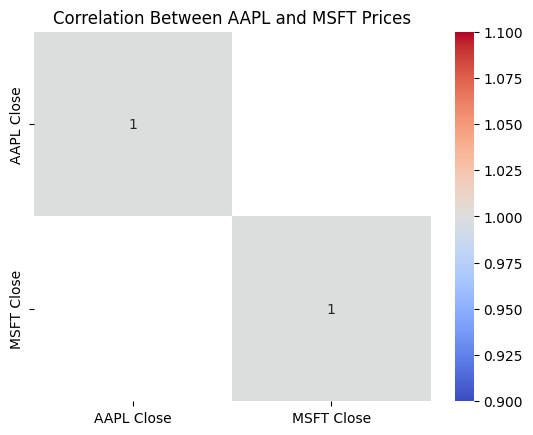

In [11]:
import seaborn as sns
# Fetch data for another stock (e.g., Microsoft)
params['symbol'] = 'MSFT'
msft_response = requests.get(BASE_URL, params=params)
msft_data = pd.DataFrame.from_dict(msft_response.json()['Time Series (Daily)'], orient='index')
msft_data = msft_data[['4. close']].astype(float).sort_index()
msft_data.columns = ['MSFT Close']

# Merge the Apple and Microsoft datasets
combined_data = pd.concat([df['Close'], msft_data], axis=1)
combined_data.columns = ['AAPL Close', 'MSFT Close']

# Calculate the correlation matrix
correlation_matrix = combined_data.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Between AAPL and MSFT Prices')
plt.show()


Step 10: Export Cleaned and Analyzed Data
Markdown Explanation
Finally, we will save the cleaned and analyzed dataset to a CSV file for further use 

In [13]:
# Save the data to a CSV file
df.to_csv('stock_analysis_with_insights.csv', index=True)
print("Data exported successfully!")



Data exported successfully!
